In [1]:
# Import all important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split # to split the dataset into training and testing set
#To perform cross validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
# Selecting approprite models for measuring performance
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, KFold, StratifiedKFold

# To create and select  Classifier model
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# To create and select Gradient boost classifier
from xgboost import XGBClassifier
# To create and select LigtGBM Classifier
from lightgbm import LGBMClassifier
# To make standardize our training and testing set
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Data_for_UCI_named (1).csv to Data_for_UCI_named (1) (1).csv


In [3]:
#loading the dataset
df = pd.read_csv('Data_for_UCI_named (1).csv', low_memory=False)
df.head()


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
# The dataset has 10000 rows and 14 columns
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
# retrieve the dataset and save to local machine
#url =  "https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv"


In [6]:
# Checking for missing values
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

Preprocessing the data and separate the target and feature variables

In [7]:
# Having a look at the target column
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [8]:
# Dropping the stab column as direccted 
df.drop('stab', axis = 1, inplace = True)
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


In [9]:
#Seperating the X and target 
X = df.drop(columns='stabf')
y = df['stabf']


In [27]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [28]:
# define StandardScalar

scaler = StandardScaler()

# standardize the training data
standard_train_X = scaler.fit_transform(X_train)
standard_train_X = pd.DataFrame(standard_train_X, columns=X_train.columns)

In [29]:
# standardize the test data
X_test = X_test.reset_index(drop=True)
standard_test_X = scaler.transform(X_test)
standard_test_X = pd.DataFrame(standard_test_X, columns=X_test.columns)

In [30]:
standard_train_X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575


In [31]:
# Define the training model with function
def train_model(model, X_train = standard_train_X, y_train = y_train, X_test = standard_test_X):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
   
    return classification_report(y_pred, y_test)
    

In [32]:
# define the model
rfc = RandomForestClassifier(random_state=1)
xgb = XGBClassifier(max_depth=3, learning_rate=0.1, random_state=1)
lgbm = LGBMClassifier(random_state=1)
extc = ExtraTreesClassifier(random_state=1)

In [33]:
# the hyperparameter grid needed to run a Randomized Cross Validation Search (RandomizedSearchCV).

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

QUESTION:What is the accuracy on the test set using the random forest classifier? In 4 decimal places.**

In [34]:
# Print accuracy of RandomForestlassifier in 4 DP
rfc.fit(standard_train_X, y_train)
accuracy = accuracy_score(y_true=y_test, y_pred=rfc.predict(standard_test_X))
print('Accuracy: {}'.format(round(accuracy, 4)))

Accuracy: 0.929


QUESTION:What is the accuracy on the test set using the XGboost classifier? In 4 decimal places.

In [35]:
# Print accuracy of XGBClassifier in 4 DP
xgb.fit(standard_train_X, y_train)
accuracy = accuracy_score(y_true=y_test, y_pred=xgb.predict(standard_test_X))
print('Accuracy: {}'.format(round(accuracy, 4)))

Accuracy: 0.9195


QUESTION:What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.

In [36]:
# Print accuracy of LGBMClassifier in 4 DP
lgbm.fit(standard_train_X, y_train)
accuracy = accuracy_score(y_true=y_test, y_pred=lgbm.predict(standard_test_X))
print('Accuracy: {}'.format(round(accuracy, 4)))

Accuracy: 0.9375


In [37]:
# Define Randomized Search Cross Validation 
rsearch = RandomizedSearchCV(extc, hyperparameter_grid, random_state=1)

In [38]:
# Printing the Classification report of each model
print("Classification Report using RandomForestClassifier \n", train_model(rfc))
print("Classification Report using ExtraTreesClassifier \n", train_model(extc))
print("Classification Report using XGBClassifier \n", train_model(xgb))
print("Classification Report using LGBMClassifier \n", train_model(lgbm))


Classification Report using RandomForestClassifier 
               precision    recall  f1-score   support

      stable       0.88      0.92      0.90       680
    unstable       0.96      0.93      0.95      1320

    accuracy                           0.93      2000
   macro avg       0.92      0.93      0.92      2000
weighted avg       0.93      0.93      0.93      2000

Classification Report using ExtraTreesClassifier 
               precision    recall  f1-score   support

      stable       0.85      0.94      0.89       644
    unstable       0.97      0.92      0.95      1356

    accuracy                           0.93      2000
   macro avg       0.91      0.93      0.92      2000
weighted avg       0.93      0.93      0.93      2000

Classification Report using XGBClassifier 
               precision    recall  f1-score   support

      stable       0.85      0.92      0.88       655
    unstable       0.96      0.92      0.94      1345

    accuracy                      

In [39]:
print("Classification Report using RandomizedSearchCV \n", train_model(rsearch))

Classification Report using RandomizedSearchCV 
               precision    recall  f1-score   support

      stable       0.87      0.92      0.89       672
    unstable       0.96      0.93      0.94      1328

    accuracy                           0.93      2000
   macro avg       0.91      0.93      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [40]:
# Define confusion metrix
def make_confusion_matrix(model, X_train = standard_train_X, X_test=standard_test_X, y_test = y_test, labels = ['stable', 'unstable']):
    new_pred = model.predict(X_test)
    cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_pred, labels=labels)
    return cnf_mat

QUESTION:After creating each binary classification model, you generated the corresponding confusion matrix. Which confusion matrix represents the model that satisfies the requirements? 


In [41]:

# Printing out confusion matrix of all the models
print("Confusion Matrix using RandomForestClassifier \n", make_confusion_matrix(rfc))
print("Confusion Matrix using ExtraTreesClassifier \n", make_confusion_matrix(extc))
print("Confusion Matrix using XGBClassifier \n", make_confusion_matrix(xgb))
print("Confusion Matrix using LGBMClassifier \n", make_confusion_matrix(lgbm))
print("Confusion Matrix using RandomizedSearchCV \n", make_confusion_matrix(rsearch))

Confusion Matrix using RandomForestClassifier 
 [[ 625   87]
 [  55 1233]]
Confusion Matrix using ExtraTreesClassifier 
 [[ 606  106]
 [  38 1250]]
Confusion Matrix using XGBClassifier 
 [[ 603  109]
 [  52 1236]]
Confusion Matrix using LGBMClassifier 
 [[ 635   77]
 [  48 1240]]
Confusion Matrix using RandomizedSearchCV 
 [[ 619   93]
 [  53 1235]]


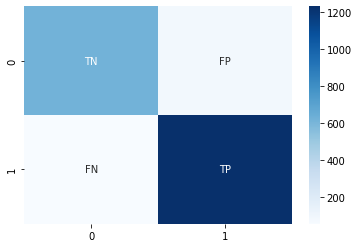

In [42]:
# This is the confusion matrix heatmap representation of RandomForestClassifier 
labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(make_confusion_matrix(rfc), annot=labels, fmt='', cmap='Blues')

In [43]:
# Building the model 
extra_tree_forest = ExtraTreesClassifier() 

# Training the model 
extra_tree_forest.fit(standard_train_X, y_train) 

# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 

# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0) 

QUESTION::Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Comparison of different Feature Importances')

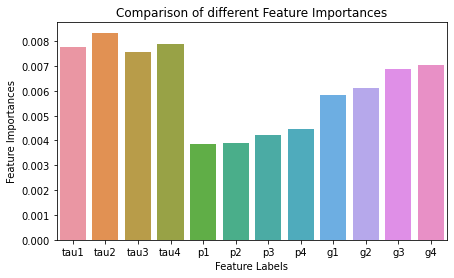

In [44]:
# Plotting a Bar Graph to compare the models 
plt.figure(figsize=(7, 4))
sns.barplot(standard_train_X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances')  

Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1. What are the best hyperparameters from the randomized search CV?


N_estimators = 100 , min_samples_split = 7 , min_samples_leaf = 4, max_features = None